In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import joblib
from sklearn.preprocessing import MinMaxScaler

In [2]:
model = joblib.load("RandomForest.pkl")

In [3]:
mnist = pd.read_csv("../datasets/mnist_784.csv",dtype="int16")


X = pd.DataFrame(mnist.iloc[:,:-1])
y = pd.DataFrame(mnist.iloc[:,-1:])

scaler = joblib.load("scaler.pkl")

X_scaled = pd.DataFrame(scaler.transform(X))

X_train, y_train = X_scaled.iloc[:60000], y.iloc[:60000]
X_test, y_test = X_scaled.iloc[60000:], y.iloc[60000:]

In [4]:
y_pred = model.predict(X_train)

In [5]:
y_train_6 = y_train["class"]==6

In [6]:
tp = X_train[(y_pred == True) & (y_train_6==True)].shape[0]; print(tp)
fp = X_train[(y_pred == True) & (y_train_6==False)].shape[0]; print(fp)
tn = X_train[(y_pred == False) & (y_train_6==False)].shape[0]; print(tn)
fn = X_train[(y_pred == False) & (y_train_6==True)].shape[0]; print(fn)
print("Precision: ",tp/(fp+tp))
print("Recall:", tp/(tp+fn))

5880
17
54065
38
Precision:  0.9971171782262167
Recall: 0.9935789117945252


In [56]:
fp_examples = X_train[(y_pred == False) & (y_train_6==True)]
fp_examples_class = y_train[(y_pred == False) & (y_train_6==True)]
fp_examples_class.shape

(38, 1)

6  6  6  6  

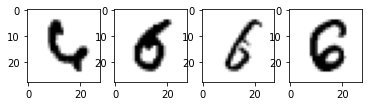

In [58]:
fp_examples_origin = scaler.inverse_transform(fp_examples)

fg,ax = plt.subplots(1,4)

for i, a in enumerate(ax):
    a.imshow(fp_examples_origin[i].reshape(28,28), cmap="binary")
    print(fp_examples_class.iloc[i]["class"]," ",  end='')

In [10]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_6, y_pred)

array([[54065,    17],
       [   38,  5880]], dtype=int64)